In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importação dos dados do Fortran

In [99]:
df = pd.read_csv('./periodos.csv', sep=',', header=0)
df.head()

,theta,periodo_sim,periodo_int,periodo_apx
0,1.570796,7.41,7.416299,7.252131
1,1.555088,7.38,7.389910,7.232849
2,1.539380,7.36,7.363971,7.213761
3,1.523672,7.33,7.338473,7.194867
4,1.507964,7.31,7.313410,7.176166


# Gráfico de $T(\theta_0)$

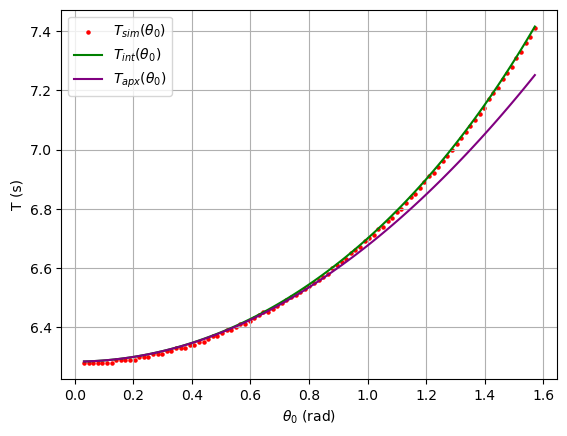

In [100]:
f1, ax1 = plt.subplots()
ax1.scatter(df['theta'], df['periodo_sim'], label='$T_{sim}(\\theta_0)$', s=5, color='red')
ax1.plot(df['theta'], df['periodo_int'], label='$T_{int}(\\theta_0)$', color='green')
ax1.plot(df['theta'], df['periodo_apx'], label='$T_{apx}(\\theta_0)$', color='purple')
ax1.set_xlabel('$\\theta_0$ (rad)')
ax1.set_ylabel('T (s)')
ax1.grid()
ax1.legend()

## Erro absoluto entre $T_{int}$ e $T_{sim}$

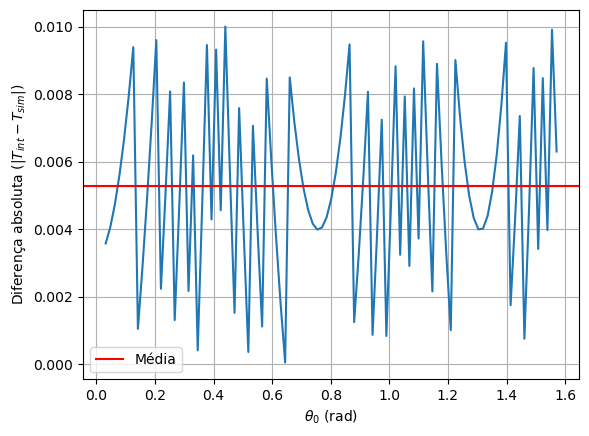

In [104]:
f2, ax2 = plt.subplots()
dif = abs(df['periodo_int']-df['periodo_sim'])
mean = np.mean(dif)
ax2.plot(df['theta'], dif)
ax2.set_xlabel('$\\theta_0$ (rad)')
ax2.axhline(mean, label='Média', color='red')
ax2.set_ylabel('Diferença absoluta ($|T_{int} - T_{sim}|$)')
ax2.grid()
ax2.legend()

## Erro absoluto entre $T_{int}$ e $T_{apx}$

In [126]:
dif = abs(df['periodo_int']-df['periodo_apx'])
dif[np.isclose(np.array(dif), mean, 1e-2)]
angulo = df.iloc[56]

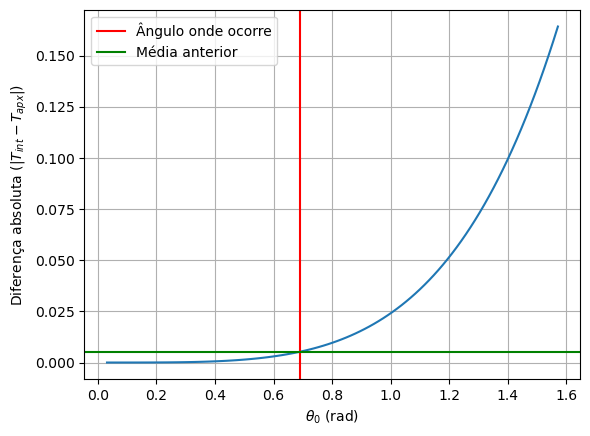

In [131]:
f3, ax3 = plt.subplots()
ax3.plot(df['theta'], dif)
ax3.set_xlabel('$\\theta_0$ (rad)')
ax3.axvline(df.iloc[56]['theta'], label='Ângulo onde ocorre', color='red')
ax3.axhline(mean, label='Média anterior', color='green')
ax3.set_ylabel('Diferença absoluta ($|T_{int} - T_{apx}|$)')
ax3.grid()
ax3.legend()